### 1.5.2 第2个环节：数据的收集和预处理

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

(X_train_image, y_train_label), (X_test_image, y_test_label) = mnist.load_data()

In [4]:
print("特征集张量形状：", X_train_image.shape) # 用shape方法显示张量的形状
print("第一个数据样本：\n", X_train_image[0])

特征集张量形状： (60000, 28, 28)
第一个数据样本：
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

In [5]:
print("第一个数据样本的标签：", y_train_label[0])

第一个数据样本的标签： 5


In [7]:
# 数据转换工作
from keras.utils import to_categorical
X_train = X_train_image.reshape(60000, 28, 28, 1)   # 给标签增加一个维度
X_test = X_test_image.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train_label, 10) # 特征转换为one-hot编码
y_test = to_categorical(y_test_label, 10) # 特征转换为one-hot编码

print("数据集张量形状：", X_train.shape)
print("第一个数据标签：", y_train[0])

数据集张量形状： (60000, 28, 28, 1)
第一个数据标签： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



### 1.5.3 第3个环节：选择机器学习模型

In [11]:
# MNIST数据集手写数字识别
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = models.Sequential() # 用序贯方式建模
model.add(Conv2D(32, (3,3), activation='relu',    # 添加Conv2D层
                                input_shape=(28, 28, 1)))              # 指定输入数据样本张量的类型
model.add(MaxPooling2D(pool_size=(2,2)))             # 添加MaxPooling2D层
model.add(Conv2D(64, (3,3), activation='relu')) # 添加Conv2D层
model.add(MaxPooling2D(pool_size=(2, 2)))           # 添加MaxPooling2D层
model.add(Dropout(0.25))    # 添Dropout加层
model.add(Flatten())            # 展平
model.add(Dense(128, activation='relu'))    # 添加全连接层
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax')) # softmax分类激活，输出10维分类码
# 编译模型
model.compile(optimizer='rmsprop',  # 指定优化器
                            loss='categorical_crossentropy', # 指定损失函数
                            metrics=['accuracy'])   # 指定验证过程中的评估指标

In [12]:
# fit拟合
model.fit(X_train, y_train,             # 指定训练特征集和训练标签集
                    validation_split=0.3,   # 部分训练集数据拆分成验证集
                    epochs=5,               # 训练轮次为5轮
                    batch_size=128)

Epoch 1/5
329/329 [==============================] - 12s 37ms/step - loss: 1.6845 - accuracy: 0.8111 - val_loss: 0.1466 - val_accuracy: 0.9574
Epoch 2/5
329/329 [==============================] - 13s 38ms/step - loss: 0.2017 - accuracy: 0.9452 - val_loss: 0.0779 - val_accuracy: 0.9787
Epoch 3/5
329/329 [==============================] - 12s 37ms/step - loss: 0.1395 - accuracy: 0.9617 - val_loss: 0.0797 - val_accuracy: 0.9798
Epoch 4/5
329/329 [==============================] - 12s 36ms/step - loss: 0.1189 - accuracy: 0.9677 - val_loss: 0.0827 - val_accuracy: 0.9818
Epoch 5/5
329/329 [==============================] - 12s 36ms/step - loss: 0.1059 - accuracy: 0.9716 - val_loss: 0.0698 - val_accuracy: 0.9837


### 1.5.5 第5个环节：超参数调试和性能优化

In [13]:
# 在测试集上评估模型
score = model.evaluate(X_test, y_test) 
print("测试集预测准确度：", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0635 - accuracy: 0.9846
测试集预测准确度： 0.9846000075340271


[9.4449442e-15 1.8798775e-11 4.0123642e-09 8.0469409e-09 1.7034626e-12
 4.3635156e-15 8.2535572e-17 1.0000000e+00 3.0502645e-12 1.1226295e-10] 转换一下格式得到： 7


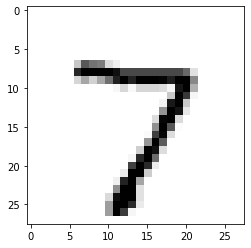

In [14]:
pred = model.predict(X_test[0].reshape(1, 28, 28, 1))
print(pred[0], "转换一下格式得到：", pred.argmax())
import matplotlib.pyplot as plt
plt.imshow(X_test[0].reshape(28, 28), cmap='Greys')